<a href="https://www.advfn.com/nasdaq/nasdaq.asp?companies=A">Nasdaq Stocks</a>

In [1]:
!python3 best_stock_by_state.py

Current State: 1
n batches: 112
ZKID
Total DFs: 112
Complete. Data written to ../data/dar_by_state.csv


In [2]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

from best_stock_by_state import get_daily_returns

In [5]:
states = pd.read_csv('../data/hmm_exp_returns.csv')
states = states[['Date', 'state']]
states.index = pd.to_datetime(states.Date)
states.drop(columns='Date', inplace=True)
states.head()

,state
Date,
1970-01-02,2
1970-01-05,2
1970-01-06,2
1970-01-07,2
1970-01-08,2


In [6]:
states.state.value_counts()

4    2481
3    2042
1    1904
0    1675
2    1567
7    1504
5    1428
6     777
Name: state, dtype: int64

In [7]:
STATES = sorted(states.state.unique())
CURRENT_STATE = states.state.to_numpy()[-1]
CURRENT_STATE

1

In [10]:
TOMORROW = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 50
MIN_YEARS = 10
START = TOMORROW - timedelta(YEARS_OF_DATA * 365)

In [12]:
df = pd.read_csv('../data/dar_by_state.csv', index_col=0)
df.head()

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7
ARGD,1.000163,0.998806,0.999905,1.000787,1.001528,1.000198,0.999810,1.000366,1.000970
ARGO,1.000290,0.992879,0.999947,1.001215,1.002712,1.000775,1.001297,1.001264,1.003097
ARI,1.000343,0.991265,1.001544,1.000694,1.000958,1.000688,1.001745,1.001944,1.003306
ARKR,1.000089,0.994370,0.999610,1.000416,0.999137,1.001434,1.000834,1.000937,1.001896
ARL,1.000009,0.996964,0.999993,0.999164,0.999948,1.000018,1.000796,0.999169,1.003021


In [13]:
trans = pd.read_csv('transition_probs.csv')
trans

,next_state,prob
0,0,0.054125
1,1,0.933789
2,2,0.004729
3,6,0.002102
4,7,0.005255


In [14]:
df['weighted'] = 0

for state, prob in zip(trans.next_state, trans.prob):
    df['weighted'] += prob * df[f'dar_{state}']

#if CURRENT_STATE == 0:
#    df['weighted'] = (
#        0.8*df[f'dar_{CURRENT_STATE}'] 
#        + 0.2*df[f'dar_{CURRENT_STATE + 1}'])
#elif CURRENT_STATE == 1:
#    df['weighted'] = (
#        0.6*df[f'dar_{CURRENT_STATE}']
#        + 0.2*df[f'dar_{CURRENT_STATE + 1}']
#        + 0.2*df[f'dar_{CURRENT_STATE - 1}'])
#elif CURRENT_STATE == 5:
#    df['weighted'] = (
#        0.6*df[f'dar_{CURRENT_STATE}']
#        + 0.2*df[f'dar_{CURRENT_STATE + 1}']
#        + 0.2*df[f'dar_{CURRENT_STATE - 1}'])
#elif CURRENT_STATE == ...
#elif CURRENT_STATE == 7:
#    df['weighted'] = (
#        0.8*df[f'dar_{CURRENT_STATE}']
#        + 0.2*df[f'dar_{CURRENT_STATE - 1}'])
df = df.sort_values('weighted', ascending=False)
df.head()

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7,weighted
AMPY,0.997950,0.976450,1.005482,0.990923,1.017027,0.999885,1.001958,1.003276,0.998314,1.003800
EFXT,1.000015,0.992578,1.003922,0.999245,0.998562,1.000978,0.998901,1.001821,0.999236,1.003257
LFMD,1.000494,0.992518,1.003378,1.005092,1.009486,1.000205,0.995545,1.000491,1.004403,1.002798
TRGP,1.001087,0.988337,1.003469,1.000327,1.000995,1.001674,1.002437,1.002998,1.006247,1.002649
ZYXI,1.000808,0.997160,1.002768,1.000863,1.008290,1.001446,1.001082,1.001101,0.999604,1.002436


In [15]:
df.mean(), df.median()

(dar         1.000119
 dar_0       0.991821
 dar_1       1.000215
 dar_2       1.000951
 dar_3       0.998202
 dar_4       1.000952
 dar_5       0.999940
 dar_6       1.001555
 dar_7       1.003426
 weighted    0.999783
 dtype: float64,
 dar         1.000287
 dar_0       0.991853
 dar_1       1.000343
 dar_2       1.001045
 dar_3       1.001072
 dar_4       1.000982
 dar_5       1.001813
 dar_6       1.001577
 dar_7       1.003528
 weighted    0.999980
 dtype: float64)

In [16]:
always_exclude = ['EP', 'NXN', 'NXP']
exclude = {
    0: [],
    1: ['AMPY', 'EFXT', 'SLCA', 'TTSH'],
    5: [],
    6: [],
    7: []}

In [17]:
best_weighted = [
    s for s in df.index
    if s not in exclude[CURRENT_STATE] + always_exclude
][:20]

In [18]:
print(sorted(best_weighted))
#sorted(best_weighted)

['AMRC', 'CLW', 'COOP', 'CSIQ', 'ESTE', 'FSI', 'GGB', 'LFMD', 'LPLA', 'MTDR', 'PARR', 'PRIM', 'SIX', 'TGLS', 'TITN', 'TRGP', 'UTHR', 'VIVO', 'VOC', 'ZYXI']


In [19]:
holdings = pd.read_csv(
    '~/Downloads/Holdings - Damian Satterthwaite-Phillips.csv',
    usecols=['Symbol', 'Value'],
    index_col=0
).rename(columns={'Value': 'holdings'})
holdings.holdings = holdings.holdings.apply(
    lambda x: round(float(x.replace('$', '').replace(',', ''))))
holdings.head()

,holdings
Symbol,
AAPL,1213
ADBE,1033
ADYEY,1473
ANET,1265
CRWD,1194


In [20]:
DOLLAR_AMT = 102_240
FRAC_IN = 0.8
current = df.loc[best_weighted]
current['w'] = (current.weighted - 1) 
current.w = current.w / current.w.sum()
current['amt'] = (DOLLAR_AMT * FRAC_IN * current.w).round().astype(int)
current = pd.concat([current, holdings], axis=1)
current[['amt', 'holdings']] = current[['amt', 'holdings']].fillna(0).astype(int)
current['diff'] = current.amt - current.holdings
current.sort_values('diff')

,dar,dar_0,dar_1,dar_2,dar_3,dar_4,dar_5,dar_6,dar_7,weighted,w,amt,holdings,diff
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1714,-1714
MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1675,-1675
MNST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1531,-1531
PAYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1522,-1522
NVDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1521,-1521
TTD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1505,-1505
DGX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1479,-1479
ADYEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1473,-1473
SHOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1322,-1322
VEEV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1314,-1314


In [21]:
data = (
    yf
    .download(best_weighted, start=START, end=TOMORROW)
    .rename(columns={'Adj Close': 'AdjClose'}))['AdjClose']

[*********************100%***********************]  20 of 20 completed


In [22]:
data.index = pd.to_datetime(data.index)
data = data.sort_index()
data.tail()

,AMRC,CLW,COOP,CSIQ,ESTE,FSI,GGB,LFMD,LPLA,MTDR,PARR,PRIM,SIX,TGLS,TITN,TRGP,UTHR,VIVO,VOC,ZYXI
Date,,,,,,,,,,,,,,,,,,,,
2023-01-09,56.560001,36.619999,41.939999,38.570000,13.60,2.860,5.88,1.93,222.500000,56.320000,22.490000,23.660000,26.100000,30.790001,41.099998,74.919998,264.970001,33.570000,10.64,15.650000
2023-01-10,57.439999,34.810001,43.000000,42.049999,13.39,2.930,6.14,1.90,225.779999,56.889999,22.370001,24.010000,25.240000,30.650000,42.520000,74.389999,263.410004,33.580002,11.41,16.540001
2023-01-11,59.029999,35.240002,44.689999,42.869999,13.39,3.040,6.27,1.92,220.720001,57.790001,22.420000,23.920000,24.940001,31.379999,41.750000,74.650002,263.790009,33.580002,11.95,16.299999
2023-01-12,60.070000,35.919998,44.299999,43.180000,13.72,3.350,6.35,1.93,227.229996,59.990002,22.910000,24.549999,26.059999,31.990000,42.200001,75.410004,261.559998,33.610001,12.29,16.620001
2023-01-13,59.700001,36.560001,44.560001,43.000000,13.83,3.329,6.39,2.01,230.289993,60.000000,23.570000,24.830000,26.420000,32.220001,42.900002,75.400002,261.040009,33.660000,11.90,16.799999


In [23]:
data = pd.concat([data, states], axis=1)

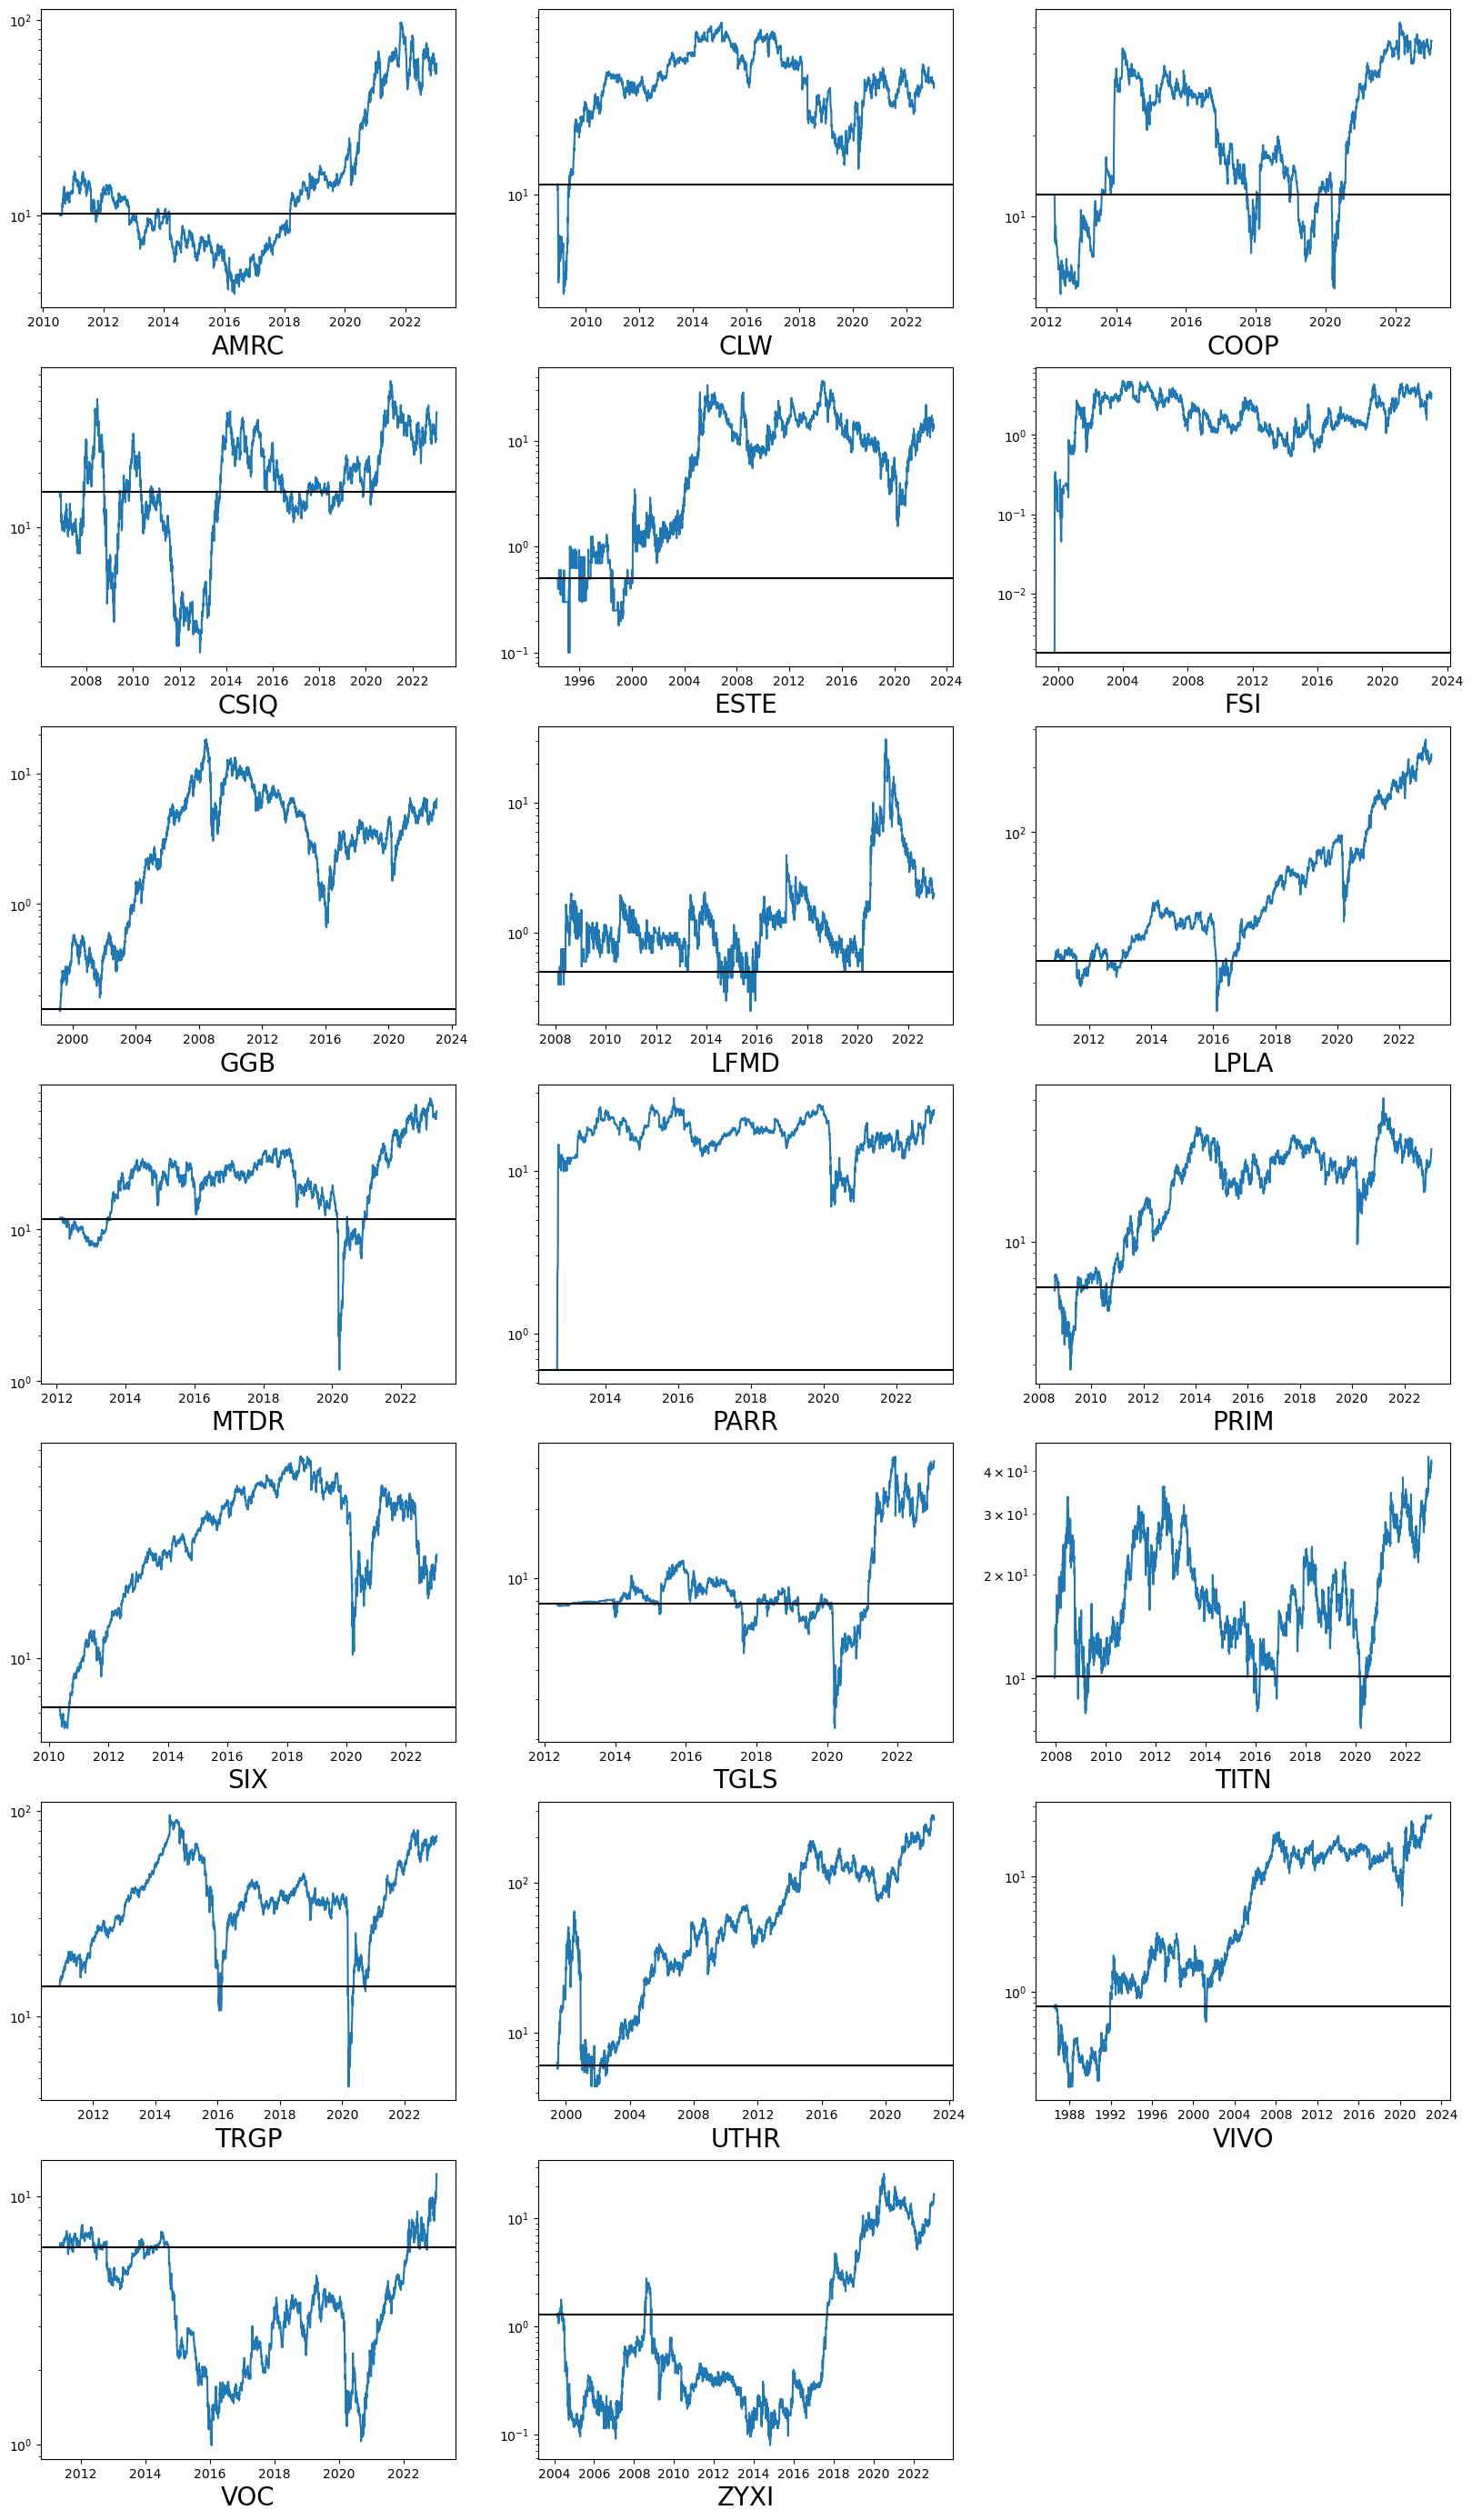

In [24]:
plt.rc('axes', labelsize=20)
plt.figure(figsize=[20, 35])
for i, sym in enumerate(list(data)):
    if sym == 'state':
        continue
    x = data[sym]
    x = x[x.notnull()]
    plt.subplot(7, 3, i + 1)
    plt.plot(x)
    plt.axhline(y=x[0], color='k')
    plt.xlabel(sym)
    plt.yscale('log');

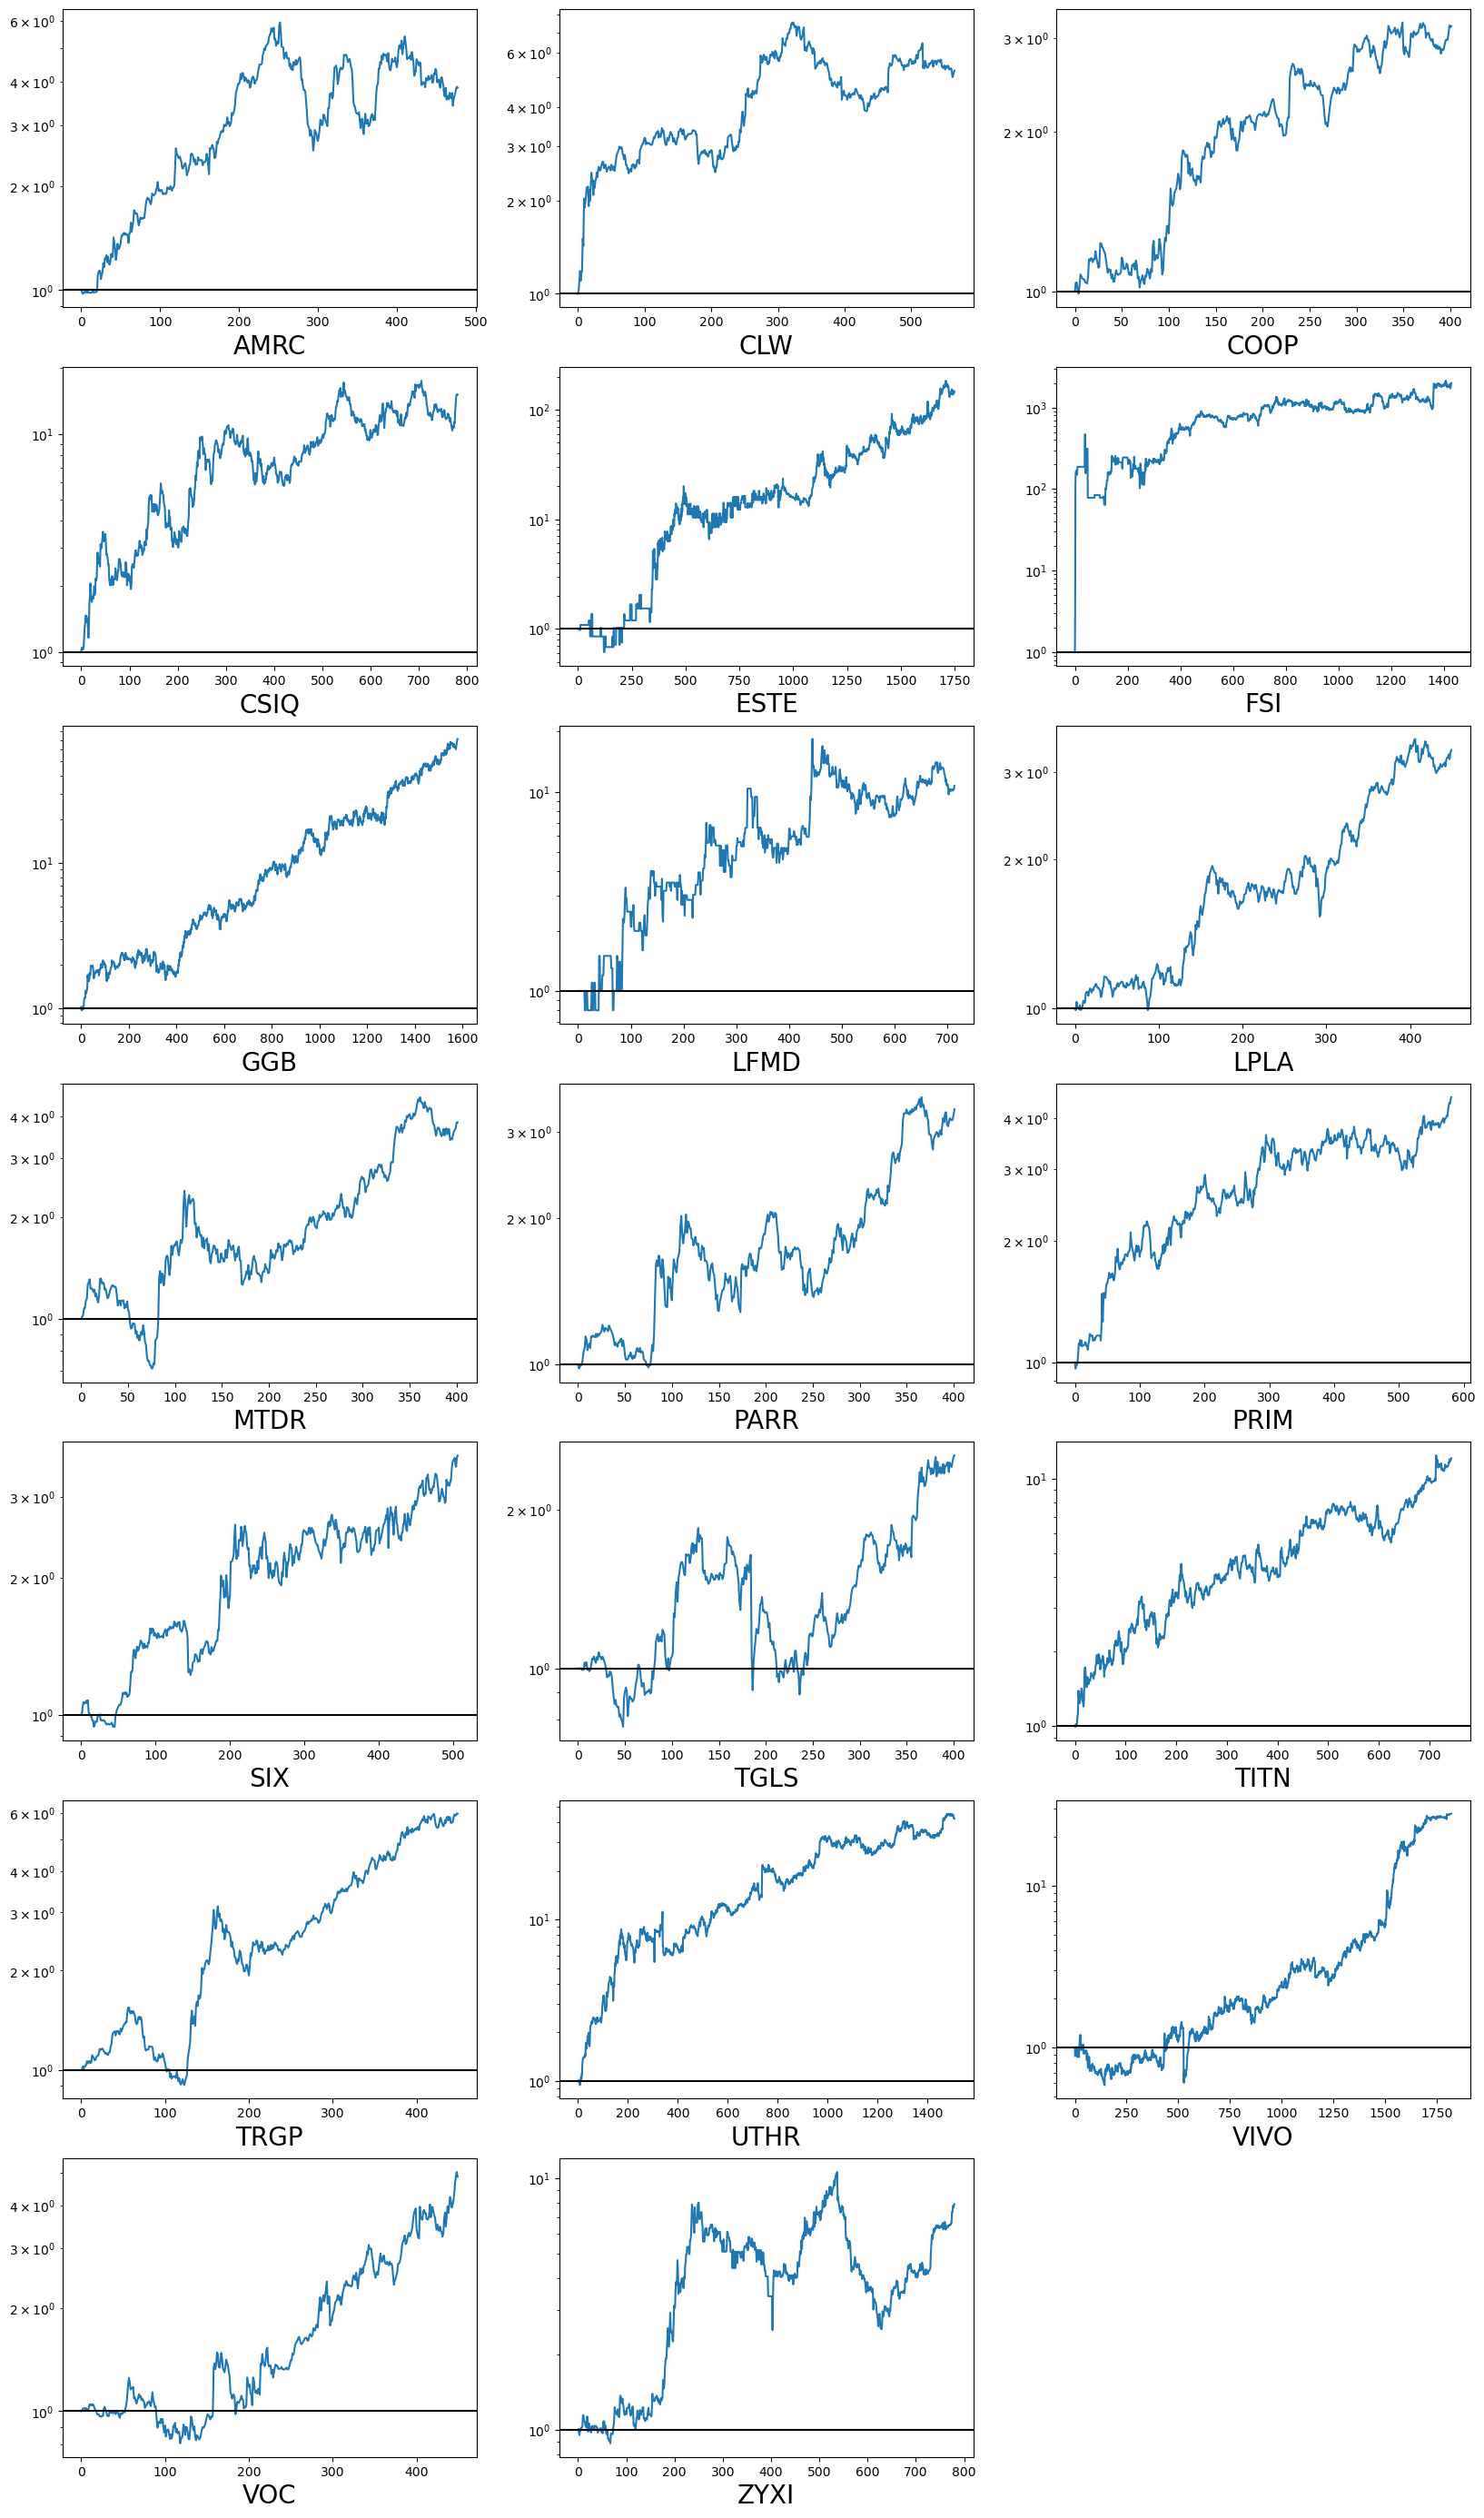

In [25]:
plt.figure(figsize=[20, 35])
for i, sym in enumerate(list(data)):
    if sym == 'state':
        continue
    plt.subplot(7, 3, i + 1)
    dr = get_daily_returns(data[sym])
    dr = dr[data.state == CURRENT_STATE]
    dr = dr[dr.notnull()]
    dr = (dr + 1).to_numpy()
    dr = np.array([1] + list(dr))
    plt.plot(dr.cumprod())
    plt.axhline(y=dr[0], color='k')
    plt.yscale('log')
    plt.xlabel(sym);